# 期中练习

## 要求

检验对上半学期知识的掌握，课后自行完成，可查阅各种资料。

### 如何提交

- 复制本文件，文件名改为`教学班号-编号.ipynb`。例如刘国强同学是2班第15号，文件名应改为`2-15.ipynb`。
- 在复制文件中答题，每道题的答案紧接题目。
- 答题结束后commit该文件，并提交pull request。



In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 练习1

为了分析自变量$x$和因变量$y$的关系，通过测量得到带误差的20个样本数据如下所示

In [2]:
X = np.array([ 0.70846042, -0.68388789,  1.03780474,  1.08334621,  0.77026309,
        0.19722004, -0.46819526, -0.45270204,  0.02362673,  0.06549472,
        0.08898416,  0.59424455, -0.26400365,  0.2456922 ,  0.5114847 ,
       -0.31604016, -1.49329364,  1.24112288,  1.01993764,  1.75634392])

In [3]:
Y = np.array([ 4.49682518,  3.5737603 ,  7.93568197,  3.58719009,  5.38341441,
        5.47930021, -0.9861325 , -0.15686681,  2.36963799,  4.01600211,
       -0.20329642,  3.07728831, -1.30408343,  2.84796441,  2.27915787,
        2.62078689, -1.2855133 ,  4.39242028,  6.24385669,  6.00822241])

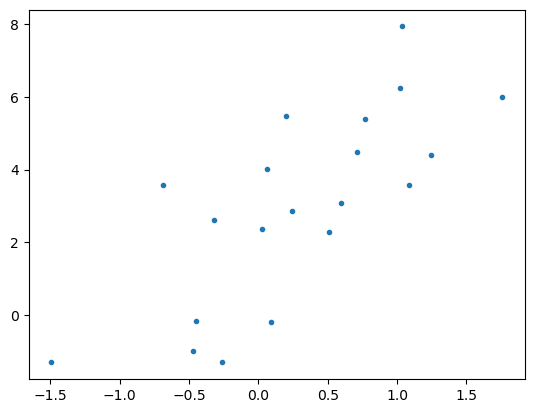

In [4]:
plt.plot(X, Y, ".")

### 1.1 划分训练集和测试集

将20个数据点划分为训练集和测试集，期中训练集为前15个数据点，测试集为后5个。

In [5]:
X_train=X[:15]
Y_train=Y[:15]
X_test=X[15:]
Y_test=Y[15:]

### 1.2 数据建模

分别用1到4次多项式函数作为模型拟合训练集中的数据，并分别计算每个模型与数据的均方差（MSE）。

哪一个模型与训练数据拟合最好？

In [6]:
# 1次多项式拟合
coeffs_1 = np.polyfit(X_train, Y_train, 1)
poly_1 = np.poly1d(coeffs_1)
Y_pred_1 = poly_1(X_train)

In [7]:
# 2次多项式拟合
coeffs_2 = np.polyfit(X_train, Y_train, 2)
poly_2 = np.poly1d(coeffs_2)
Y_pred_2 = poly_2(X_train)

In [8]:
# 3次多项式拟合
coeffs_3 = np.polyfit(X_train, Y_train, 3)
poly_3 = np.poly1d(coeffs_3)
Y_pred_3 = poly_3(X_train)

In [9]:
# 4次多项式拟合
coeffs_4 = np.polyfit(X_train, Y_train, 4)
poly_4 = np.poly1d(coeffs_4)
Y_pred_4 = poly_4(X_train)

In [10]:
# 计算每个模型的 MSE
MSE_1 = np.mean((Y_train - Y_pred_1) ** 2)
MSE_2 = np.mean((Y_train - Y_pred_2) ** 2)
MSE_3 = np.mean((Y_train - Y_pred_3) ** 2)
MSE_4 = np.mean((Y_train - Y_pred_4) ** 2)

print("1次多项式模型的MSE为：", MSE_1)
print("2次多项式模型的MSE为：", MSE_2)
print("3次多项式模型的MSE为：", MSE_3)
print("4次多项式模型的MSE为：", MSE_4)

1次多项式模型的MSE为： 3.614119980936592
2次多项式模型的MSE为： 3.4709875708912987
3次多项式模型的MSE为： 3.0102468155333737
4次多项式模型的MSE为： 2.3971661654711816


根据计算得到的均方差,可以看出4次多项式函数的MSE最小,即4次多项式函数对训练数据拟合效果最好

### 1.3 模型测试
计算4个模型与测试数据的均方差，哪一个模型与测试数据拟合最好？

1.2和1.3的答案是否相同？两者的异同有什么意义？

In [11]:
MSE_test_1 = np.mean((Y_test - poly_1(X_test)) ** 2)
MSE_test_2 = np.mean((Y_test - poly_2(X_test)) ** 2)
MSE_test_3 = np.mean((Y_test - poly_3(X_test)) ** 2)
MSE_test_4 = np.mean((Y_test - poly_4(X_test)) ** 2)

print("1次多项式模型的测试MSE为：", MSE_test_1)
print("2次多项式模型的测试MSE为：", MSE_test_2)
print("3次多项式模型的测试MSE为：", MSE_test_3)
print("4次多项式模型的测试MSE为：", MSE_test_4)


1次多项式模型的测试MSE为： 1.9373288022689146
2次多项式模型的测试MSE为： 6.9248859162616085
3次多项式模型的测试MSE为： 145.53829178692064
4次多项式模型的测试MSE为： 2717.4997768004655


根据计算得到的均方差,可以看出1次多项式函数的MSE最小,即1次多项式函数对测试数据拟合效果最好。

1.2和1.3的答案不同，因为1.2是针对训练数据的均方差，而1.3是针对测试数据的均方差。
意义：
异：
  训练数据拟合效果和测试数据拟合效果可能不同。
  不同的模型可能在训练和测试数据上表现不同。
同：
  均方差评估方法可以用于评估模型在训练和测试数据上的性能。
  在训练和测试数据上都使用均方差评估方法可以帮助我们了解模型的泛化能力。

## 练习2 人工神经网络

有如下神经网络：
- 输入$x$是2维向量，输出$y$是1维标量
- 包含两个全连接层
    - 第一层有5个神经元，激活函数为sigmoid
    - 第二层有1个神经元，激活函数为relu
- 损失函数为均方差MSE

### 2.1 写出公式

- 写出relu、sigmoid函数的公式
- 写出整个神经网络的公式

ReLU函数公式：
ReLU(x) = max(0, x)

Sigmoid函数公式：
Sigmoid(x) = 1 / (1 + exp(-x))
其中exp(x)指数函数。

  整个神经网络的公式可以使用矩阵和向量的运算来表示。假设神经网络有L层，第i层包含Ni个神经元，第i层和第i+1层之间的权重矩阵是Wi，第i层的偏置向量是bi，第i层的输出向量为ai，则整个神经网络的前向传播可以表示为：

a1 = x

for i in range(1, L):

zi+1 = Wi ai + bi

ai+1 = g(zi+1)

其中x是输入向量，g(x)是激活函数

### 2.2 正向传播

假设已知4个数据点的输入'X'，参考输出'Y'，参数'W_1'、'B_1'、'W_2'、'B_2'，。

- 正向传播计算输出预测值'Y_pred'
- 计算损失值'L'


In [12]:
X = np.array([[-0.05025071,  1.12345037],
       [-1.2771336 , -0.03387919],
       [-0.06085093,  0.83960333],
       [ 0.26666122, -0.15723225]])

注意，这里输入'x'表示为行向量，即'X'中每行表示一个数据点。

In [13]:
Y = np.array([[ 0.34942997],
       [ 0.09796396],
       [ 1.80617515],
       [-0.50698293]])

In [14]:
W1 = np.random.randn(2,5)
b1 = np.random.randn(5)
W2 = np.random.randn(5,1)
b2 = np.random.randn(1,1)

In [15]:
W1 = np.array([[-0.15772071,  2.4169384 ,  1.18656177,  0.74048303,  0.95473468],
       [ 1.75613621,  0.44768404,  0.25003215,  0.52863169, -0.75204543]])

In [16]:
b1 = np.array([-1.00393578, -0.19942106, -1.23939537,  1.62336519, -0.21580562])

In [17]:
W2 = np.array([[ 0.8173788 ],
       [-0.01165333],
       [ 1.10703394],
       [ 0.90372372],
       [ 0.86510315]])

In [18]:
b2 = np.array([[0.277288]])

In [19]:
import numpy as np

# 定义激活函数sigmoid和relu
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)


# 定义正向传播
z1 = np.dot(X, W1) + b1
a1 = sigmoid(z1)
z2 = np.dot(a1, W2) + b2
Y_pred = relu(z2)

# 计算损失值
L = np.mean((Y_pred - Y) ** 2)
print('Y_pred:', Y_pred)
print('Loss:', L)

Y_pred: [[2.18514844]
 [1.35081552]
 [2.09965131]
 [1.98338406]]
Loss: 2.80688883177308


### 2.3 方向传播

计算损失值'L'对参数'W_1'、'B_1'、'W_2'、'B_2'的偏导数。

In [20]:
import numpy as np
# 定义反向传播
dY_pred = Y_pred - Y
d_z2 = np.where(z2 > 0, dY_pred, 0)
d_W2 = np.dot(a1.T, d_z2)
d_b2 = np.sum(d_z2, axis=0, keepdims=True)
d_a1 = np.dot(d_z2, W2.T)
d_z1 = d_a1 * sigmoid(z1) * (1 - sigmoid(z1))
d_W1 = np.dot(X.T, d_z1)
d_b1 = np.sum(d_z1, axis=0, keepdims=True)
# 输出偏导数值
print('dW1:', d_W1)
print('db1:', d_b1)
print('dW2:', d_W2)
print('db2:', d_b2)


dW1: [[-0.20125636 -0.00091094  0.02455481 -0.25777094 -0.09368528]
 [ 0.32208014 -0.00555787  0.40685269  0.1394073   0.28658914]]
db1: [[ 0.90681903 -0.01366548  1.08585609  0.71943809  1.05461034]]
dW2: [[2.4110839 ]
 [2.67036349]
 [1.32311774]
 [4.85214304]
 [2.12865661]]
db2: [[5.87241318]]
